In [3]:
import os
import json
import pandas as pd
import random
from pathlib import Path
import numpy as np
from math import pi, cos, sin
import cv2 as cv
import matplotlib.pyplot as plt
import shutil
from circum import xy_values
import shutil
import ast

In [4]:
os.chdir("../Annotation projects/ACFR/almonds")

In [5]:
# all_images = os.listdir("images")

In [6]:
# val_set = random.sample(all_images,int(0.2*len(all_images)))
# test_set = random.sample(list(np.setdiff1d(all_images,val_set)),int(0.2*len(all_images)))
# train_set = np.setdiff1d(list(np.setdiff1d(all_images,val_set)),test_set)

In [7]:
# set_ = "test"
# for i in test_set:
#     src_train = os.path.join("images", i)
#     dest_train = os.path.join("{}_images".format(set_),i)
#     annot_name, ext = os.path.splitext(i)
#     src_csv = os.path.join("annotations", annot_name+".csv")
#     dest_csv = os.path.join("{}_csv".format(set_),annot_name+".csv")
#     shutil.copy(src_train,dest_train)
#     shutil.copy(src_csv,dest_csv)
    

In [8]:
train_csv = os.path.join(os.getcwd(),"train_csv")
train_images = os.path.join(os.getcwd(),"train_images")
filesList = os.listdir(train_csv)
file_ = random.choice(filesList)
df = pd.read_csv(os.path.join(train_csv,file_))
image_name = file_.replace(".csv",".png")
df

,#item,x,y,dx,dy,label
0,0,54.736842,77.894737,26.0,26.0,1
1,1,43.684211,2.105263,22.0,22.0,1
2,2,155.263158,40.000000,22.0,22.0,1
3,3,220.526316,139.473684,24.0,24.0,1
4,4,233.684211,253.684211,24.0,24.0,1
5,5,179.473684,21.578947,24.0,24.0,1
6,6,216.315789,3.684211,22.0,22.0,1


In [9]:
def center_radius(x,y,dx,dy):
    cx = x+(0.5*dx)
    cy = y+(0.5*dy)
    radius = 0.5*(max(dx,dy))
    return cx,cy, radius

In [10]:
images_path = os.path.join(os.getcwd(),"test_images")
annotations_path = os.path.join(os.getcwd(),"test_csv")

In [11]:
annotations_list = os.listdir(annotations_path)
a = random.choice(annotations_list)
df_a = pd.read_csv(os.path.join(annotations_path,a))
image_name =  a.replace(".csv",".png")
img = cv.imread(os.path.join(images_path,image_name))
for row in range(len(df_a)):
    cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
             df_a.at[row,"dx"],df_a.at[row,"dy"])
    df_a.at[row,"cx"] = cx
    df_a.at[row,"cy"] = cy
    df_a.at[row,"radius"] = radius_
    df_a.at[row,"filename"] = image_name
    df_a.at[row,"file_attributes"] = "{}"
    df_a.at[row,"region_count"] = len(df_a)
    df_a.at[row,'region_id'] = row
    df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
    t = {"name":"polygon","all_points_x":None,"all_points_y":None}
    x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df_a.at[row,'region_shape_attributes'] = str(t)
    df_a.at[row,"region_attributes"] = "{}"

In [12]:
df_a["file_size"] = df_a["file_size"].astype("int64")
df_a["region_count"] = df_a["region_count"].astype("int64")
df_a['region_id'] = df_a['region_id'].astype("int64")
df_a

,#item,x,y,dx,dy,label,cx,cy,radius,filename,file_attributes,region_count,region_id,file_size,region_shape_attributes,region_attributes
0,0,5.714286,3.809524,28.0,38.0,1,19.714286,22.809524,19.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,0,188750,"{'name': 'polygon', 'all_points_x': [38, 38, 3...",{}
1,1,69.523810,4.761905,26.0,28.0,1,82.523810,18.761905,14.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,1,188750,"{'name': 'polygon', 'all_points_x': [96, 96, 9...",{}
2,2,56.666667,137.619048,26.0,28.0,1,69.666667,151.619048,14.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,2,188750,"{'name': 'polygon', 'all_points_x': [83, 83, 8...",{}
3,3,104.285714,75.714286,26.0,28.0,1,117.285714,89.714286,14.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,3,188750,"{'name': 'polygon', 'all_points_x': [131, 131,...",{}
4,4,107.142857,116.190476,26.0,28.0,1,120.142857,130.190476,14.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,4,188750,"{'name': 'polygon', 'all_points_x': [134, 134,...",{}
5,5,60.476190,170.476190,26.0,28.0,1,73.476190,184.476190,14.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,5,188750,"{'name': 'polygon', 'all_points_x': [87, 87, 8...",{}
6,6,36.666667,258.095238,22.0,24.0,1,47.666667,270.095238,12.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,6,188750,"{'name': 'polygon', 'all_points_x': [59, 59, 5...",{}
7,7,15.238095,270.952381,30.0,22.0,1,30.238095,281.952381,15.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,7,188750,"{'name': 'polygon', 'all_points_x': [45, 45, 4...",{}
8,8,147.619048,269.047619,32.0,24.0,1,163.619048,281.047619,16.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,8,188750,"{'name': 'polygon', 'all_points_x': [179, 179,...",{}
9,9,175.714286,264.285714,24.0,24.0,1,187.714286,276.285714,12.0,fromWest_60_12_IMG_4678_i2400j2700.png,{},18,9,188750,"{'name': 'polygon', 'all_points_x': [199, 199,...",{}


## LOOP THROUGH ALL 3 SETS

In [13]:
for set_ in ["train", "val", "test"]:
    images_path = os.path.join(os.getcwd(),"{}_images".format(set_))
    annotations_path = os.path.join(os.getcwd(),"{}_csv".format(set_))
    annotations_list = os.listdir(annotations_path)
    metadf = pd.DataFrame(columns=['#item',
     'x',
     'y',
     'dx',
     'dy',
     'label',
     'cx',
     'cy',
     'radius',
     'filename',
     'file_attributes',
     'region_count',
     'region_id',
     'file_size',
     'region_shape_attributes',
     'region_attributes'])
    for index,annotation in enumerate(annotations_list):
        df_a = pd.read_csv(os.path.join(annotations_path,annotation))
        df_a
        image_name =  annotation.replace(".csv",".png")
        img = cv.imread(os.path.join(images_path,image_name))
        for row in range(len(df_a)):
            cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
                     df_a.at[row,"dx"],df_a.at[row,"dy"])
            df_a.at[row,"cx"] = cx
            df_a.at[row,"cy"] = cy
            df_a.at[row,"radius"] = radius_
            df_a.at[row,"filename"] = image_name
            df_a.at[row,"file_attributes"] = "{}"
            df_a.at[row,"region_count"] = len(df_a)
            df_a.at[row,'region_id'] = row
            df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
            t = {"name":"polygon","all_points_x":None,"all_points_y":None}
            x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
            t['all_points_x']  = x
            t['all_points_y'] = y
            df_a.at[row,'region_shape_attributes'] = str(t)
            df_a.at[row,"region_attributes"] = "{}"
        metadf = pd.concat([metadf, df_a], ignore_index=True, sort=False)
    metadf["file_size"] = metadf["file_size"].astype("int64")
    metadf["region_count"] = metadf["region_count"].astype("int64")
    metadf['region_id'] = metadf['region_id'].astype("int64")
    metadf
    metadf2=metadf.drop(['#item', 'cx','cy','radius','label','x','y'], axis = 1) 
    metadf2 = metadf[['filename', 'file_size',
           'file_attributes', 'region_count', 'region_id',
           'region_shape_attributes', 'region_attributes']]
    metadf2.to_csv("{}_final.csv".format(set_), index=False)

## TEST

In [14]:
# Note that this section will only effected on the last item on the 
# sets loop. We presume that if the testing shows good results
# on the one time it should also be same for all the other items.

# It looks OK.

10
fromWest_57_32_IMG_4699_i2700j1200.png


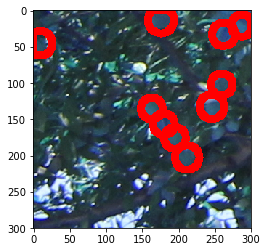

In [15]:
a = metadf2.loc[metadf2["filename"]==random.choice(metadf2["filename"].unique())]
a = a.reset_index(drop=True)
print(len(a))
image = cv.imread(os.path.join("test_images",a.iloc[0]["filename"]))
print(a.iloc[0]["filename"])
all_points = []
for i in range(len(a)):
    pts = []
    x = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_x"]
    y = ast.literal_eval(a.iloc[i]["region_shape_attributes"])["all_points_y"]
    for i,j in zip(x,y):
        pts.append([i,j])
    all_points.append(pts)

ptss = np.array(all_points)
img = cv.polylines(image,np.int32(ptss),isClosed=True,color=(255,0,0),thickness=10)
plt.imshow(image)
plt.show()
plt.close()

## Generate file names for all 3 sets

In [44]:
def WriteSets(set_path, set_name):
    files = os.listdir(set_path)
    if os.path.exists("sets/{}_filenames.txt".format(set_name)):
        print("File already exist. Skipping")
        return None
    with open("sets/{}_filenames.txt".format(set_name),"a+") as fp:
        for line in files:
            if line.startswith("via"): #skip annotations file
                continue
            fp.write(line+"\n")

In [45]:
train_images = "train_images"
test_images = "test_images"
val_images = "val_images"
all_images = "images"
WriteSets(train_images,"acfr_almonds_train")
WriteSets(test_images,"acfr_almonds_test")
WriteSets(val_images,"acfr_almonds_val")
WriteSets(all_images,"acfr_almonds_all")

373